# Justify Time-Step Parameter
We need to be able to justify the time step parameter through some experiementation.

Run a series of tests where the only thing changing is the timestep and compare the average clustering coefficient as a result of the test. 

Observe when the results stop changing. For computational efficiency, we want to use the maximum time step we can so that we can reduce the overall simulation legth

- One obstacle (scaled properly)
- A subset of birds (smaller number)
- Small domain

# Model 1
Import the model

In [1]:
import sys
import os
import numpy as np

In [2]:
# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now importing from the 'models' folder
from models.model1 import run_model1
from models.model3 import run_model3
from models.params_default import params_default

# Create an instance of the default parameters
params = params_default()

Define parameters

In [3]:
params.L = 500                 # Size of box (L*L = Area of a wind farm)
params.dt = 0.4                 # Time step
params.T = params.L/params.v0       # Minimum simulation length (seconds)
params.Nt = int(params.T/params.dt) # No. of time steps

params.R_obs = 50
params.R_bird = 100 
params.N = 500
# Grid layout
params.nrows = 1                # Number of rows in grid
params.ncols = 1              # Number of columns in grid
params.num_obstacles = (        # Total number of obstacles in grid
    params.nrows * params.ncols
)      

params.eta = 0.1

# Spacing of grid
params.rotor_spacing_side = 3                                 # Num diameters to the side between turbines
params.rotor_spacing_behind = 9                               # Num diameters behind between turbines
params.x_spacing = (3)*params.diameter      # Spacing to the side between turbines
params.y_spacing = (params.rotor_spacing_behind + 1)*params.diameter    # Spacing behind between the turbines

# Run the model

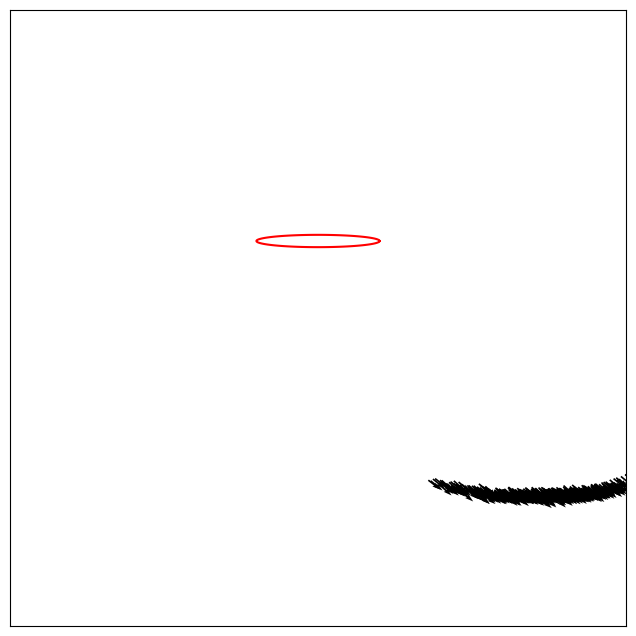

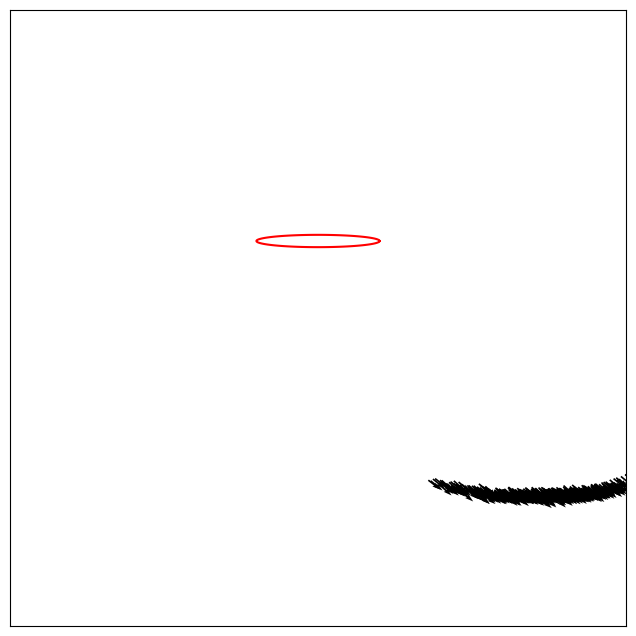

In [4]:
dispersions, clustering_coefficients = run_model1(params, plot = True)

In [7]:
import matplotlib.pyplot as plt


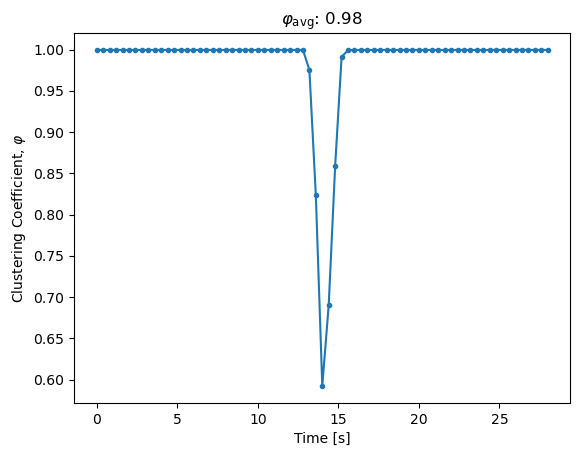

In [12]:
fig, ax = plt.subplots()

time = np.arange(0, params.Nt * params.dt, params.dt)

ax.plot(time, clustering_coefficients, '.-')

# Set figure parameters
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Clustering Coefficient, $\varphi$')


# Calculate the average clustering coefficient for the last X % of time steps
perc = 0
idx = int(perc*(len(clustering_coefficients)))

clustering_coefficient_avg = np.mean(clustering_coefficients[idx:])

# set title
ax.set_title(rf'$\varphi_\mathrm{{avg}}$: {round(clustering_coefficient_avg,2)}')


plt.show()

[30.042014664443254,
 30.043957066081443,
 30.039782306324067,
 30.027281321039833,
 30.034877671231555,
 30.048099747410728,
 30.046195468448204,
 30.057391013859164,
 30.063908367577234,
 30.06729264318147,
 30.08359186465885,
 30.097925359154367,
 30.110795873046154,
 30.1195022847796,
 30.124685504363963,
 30.122993967879903,
 30.129913261795313,
 30.15125874365354,
 30.157460027561914,
 30.168105899798533,
 30.160280339206604,
 30.15106438123011,
 30.143925227802573,
 30.131326438994527,
 30.124043235638986,
 30.105556504240923,
 30.105474524538426,
 30.09914446348114,
 30.081516839384033,
 30.08198803672746,
 30.097321266141567,
 30.09462032679973,
 30.08859417416719,
 30.090780170338768,
 29.99325724371282,
 29.60117925762717,
 29.59718135959394,
 29.767798595323644,
 29.765353159257195,
 29.98170231217385,
 30.059995865954594,
 30.10639050607288,
 30.121896134721734,
 30.127774886673016,
 30.13617606235825,
 30.14488602063201,
 30.140514251366795,
 30.142792357379907,
 30.14684